In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import math
import pygame

pygame 2.0.1 (SDL 2.0.14, Python 3.9.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# This notebook generates seating charts and rooms for bus_class
# 1. make seating_small n = 25
# 10 x 10 x 10 meters
# 5 x 5
x_list1 = []
y_list1 = []
xs = []
ys = []
for i in range(5):
    for j in range(5):
        x_list1.append(i * 20 + 10)
        y_list1.append(j * 18 + 10)
# plt.scatter(x_list1, y_list1)
# plt.xlim(0, 99)
# plt.ylim(0, 99)
student_dict = {str(i): [x_list1[i], y_list1[i]] for i in range(25)}

In [3]:
# 2. seating_large n = 40
# 50 x 30 x 10
# 5 tables 8 people per table

tables = 5
students_per_table = 4
student_locations = {i: [] for i in range(40)}
table_locations = [[5, 20], [15, 10], [25, 20], [35, 10], [45, 20]]
table_2locations = [[5, 10], [15, 20], [25, 10], [35, 20], [45, 10]]
dir_list = [[-2, -2], [-2, 2], [2, -2], [2, 2]]
dir_2list = [[2, 0], [0, 2], [-2, 0], [0, -2]]

for i in range(tables):
    for s in range(students_per_table):
        idx = 4 * i + s
        table_x, table_y = table_locations[i]
        x, y = dir_list[s]
        student_locations[idx].append(2 *(table_x + x))
        student_locations[idx].append(4 * (table_y + y) - 10)

for i in range(tables):
    for s in range(students_per_table):
        idx = 4 * i + s + 20
        table_x, table_y = table_2locations[i]
        x, y = dir_2list[s]
        student_locations[idx].append(2 *(table_x + x))
        student_locations[idx].append(4 * (table_y + y) - 10)
        
x_list = []
y_list = []
for i, j in list(student_locations.values()):
    x_list.append(i)
    y_list.append(j)
# plt.scatter(x_list, y_list)
# plt.xlim(0, 99)
# plt.ylim(0, 99)
student_dict = {str(i): [x_list[i], y_list[i]] for i in range(40)}
# student_dict

In [4]:
# 3. seating_library n = 100
# Scattered 2x2 seating with more seats than students

In [5]:
# 4. seating_gym n = 100
# 2 sides of tiered seating- do math for occupancy

In [6]:
# 5. seating_hallway n = 50
# seating = initial positions = random
# add and subtract students when x breaks min and max threshold
# This and Bathroom should be a flow- students spend random amount of time from 0-2 minutes going through (sim. lockers)
# behavior = straight line +x, vary y

In [7]:
# 6. seating_bathroom n = 5
# initial positions = none

In [8]:
def angle_of_vector(x, y):
        return pygame.math.Vector2(x, y).angle_to((1, 0))

def angle_of_line(x1, y1, x2, y2):
    return angle_of_vector(x2-x1, y2-y1)

In [9]:
# # make varying input setup for ventilation
# w1 = (20, 0)
# w2 = (74, 0)
# door = (20, 96)
# vent = (50, 96) ############### make slider for this maybe ##########
# window_size = 8 # 40 centimeters diameter
# vent_size = 2 # 20 centimeters diameter

# def make_velocity_distance(window1, window2, door_location, vent_location):
#     # function describes: y such that slope(x) = y
#     temp = [[0 for col in range(100)] for row in range(100)] # size of room in 10 cm blocks
#     x1 =  range(100)
#     # up left
#     line1_ =  [(i**2 / 100) for i in x1]
#     ytemp = 100 - line1_[int(vent_location[0]- vent_size/2)]
#     y1 = [i + ytemp for i in line1_]
#     # These lines can be edited based on # of vents ##############################
#     # left
#     w1left = window1[0] - window_size/2
#     w1right = window1[0] + window_size/2
#     v1left = vent_location[0] - vent_size / 2
#     v1right = vent_location[0] + vent_size / 2
#     x2 = [w1left, v1left]
#     y2 = [0, 100]
#     m2 = 100/(v1left-w1left)
#     b2 = 0 - m2 * w1left
#     # down left
#     x3 = [w1right, v1right]
#     y3 = [0, 100]
#     m3 = 100/(v1right-w1right)
#     b3 = 0 - m3 * w1right
#     # down
#     w2left = window2[0] - window_size/2
#     w2right = window2[0] + window_size/2
#     x4 = [w2left, v1left]
#     m4 = 100/(v1left-w2left)
#     b4 = 0 - m4 * w2left
#     # down right
#     x5 = [w2right, v1right]
#     m5 = 100/(v1right-w2right)
#     b5 = 0 - m5 * w2right
#     # right
#     line6_ =  [((100 - i)**2 / 100) for i in x1]
#     ytemp = 100 - line6_[int(v1right)]
#     y6 = [i + ytemp for i in line6_] 
#     # between windows
#     center = (window2[0] + window1[0]) / 2
#     x7 = [i for i in range(100)]
#     curve_down = [-(((i-center) / 5)**2) + center/4 for i in range(100)]
    
#     # define direction plot
#     for i in range(100):
#         for j in range(100):
#             if j < curve_down[i]: # between windows
#                 temp[j][i] = 3
#             elif (j > y1[i]): # top left
#                 temp[j][i] = 7
#             elif (j > m2 * i + b2): # left edge
#                 temp[j][i] = 4
#             elif (j > m3 * i + b3): # window 1
#                 temp[j][i] = 1
#             elif (j < m4 * i + b4): # window 1 and 2
#                 temp[j][i] = 2
#             elif (j < m5 * i + b5): # window 2
#                 temp[j][i] = 3
#             elif (j < y6[i]): # window 2
#                 temp[j][i] = 6 
#             else:  # top right
#                 temp[j][i] = 9
#             # edges
            
#             # corners
            
#             # barriers
#     direction = temp.copy() # get from temp var
# #     r1 = mpl.patches.Rectangle((vent_location[0], 96), 10, 3, color='lightblue')
    
#     #########################################
#     # velocity
#     i1 = [((i - vent_location[0]) / 3) **2 + 75 for i in xtemp]
#     i2 = [((i - vent_location[0]) / 3) **2 + 50 for i in xtemp]
#     i3 = [((i - vent_location[0]) / 3) **2 + 25 for i in xtemp]
#     i4 = [((i - vent_location[0]) / 3) **2 for i in xtemp]

#     i5 = [-(((i - w1[0])/3)**2) + 10 for i in xtemp]
#     i6 = [-(((i - w1[0])/3)**2) + 15 for i in xtemp]
#     i7 = [-(((i - w1[0])/3)**2) + 20 for i in xtemp]
#     i8 = [-(((i - w1[0])/3)**2) + 25 for i in xtemp]

#     i9 = [-(((i - w2[0])/3)**2) + 10 for i in xtemp]
#     i10 = [-(((i - w2[0])/3)**2) + 15 for i in xtemp]
#     i11 = [-(((i - w2[0])/3)**2) + 20 for i in xtemp]
#     i12 = [-(((i - w2[0])/3)**2) + 25 for i in xtemp]
#     blah = np.ones((100, 100))
#     for i in range(100):
#         for j in range(100):
#             if j < i5[i]:
#                 blah[j][i] = 4
#             elif j < i6[i]:
#                 blah[j][i] = 3.3
#             elif j < i7[i]:
#                 blah[j][i] = 2.6
#             elif j < i8[i]:
#                 blah[j][i] = 2
#             elif j < i9[i]:
#                 blah[j][i] = 4
#             elif j < i10[i]:
#                 blah[j][i] = 3.3
#             elif j < i11[i]:
#                 blah[j][i] = 2.6
#             elif j < i12[i]:
#                 blah[j][i] = 2

#             elif j > i1[i]:
#                 blah[j][i] = 5
#             elif j > i2[i]:
#                 blah[j][i] = 4
#             elif j > i3[i]:
#                 blah[j][i] = 3
#             elif j > i4[i]:
#                 blah[j][i] = 2
#             else:
#                 blah[j][i] = 1
#     velocity = blah.copy()
    
    
#     return direction, velocity # and other useful variables

In [10]:
# w1 = (20, 0)
# w2 = (74, 0)
# door = (20, 96)
# vent = (70, 96) ############### make slider for this maybe ##########
# window_size = 8 # 40 centimeters diameter
# vent_size = 2 # 20 centimeters diameter

# direction_matrix, velocity_matrix = make_velocity_distance(w1, w2, door, vent)
# # velocity of air in room
# fig, ax = plt.subplots()
# directions = ax.matshow(direction_matrix, cmap=plt.get_cmap("coolwarm_r")) # Directions
# plt.xlim(0, 99)
# plt.ylim(0, 99)    
# fig.colorbar(directions, ticks=np.linspace(1, 10, 10))
# plt.axis('off')
# plt.title('Ventilation Directions')
# # these correspond to DIRECTIONS

In [11]:
# # velocity of air in room
# fig, ax = plt.subplots()
# directions = ax.matshow(velocity_matrix, cmap=plt.get_cmap("OrRd")) # Directions
# plt.xlim(0, 99)
# plt.ylim(0, 99)    
# fig.colorbar(directions, ticks=np.linspace(1, 5, 5))
# plt.axis('off')
# plt.title('Ventilation Velocity')

In [12]:
# fig, ax = plt.subplots()

# def angle_of_vector(x, y):
#     return pygame.math.Vector2(x, y).angle_to((1, 0))

# def angle_of_line(x1, y1, x2, y2):
#     return angle_of_vector(x2-x1, y2-y1)

# e1 = mpl.patches.Ellipse((50, 100), 50, 200, color="green", angle=90 - angle_of_line(37, 0, 50, 100))
# e2 = mpl.patches.Ellipse((50, 100), 40, 150 , color="yellow", angle=90 - angle_of_line(37, 0, 50, 100))
# e3 = mpl.patches.Ellipse((50, 100), 30, 100, color="orange", angle=90 - angle_of_line(37, 0, 50, 100))
# e4 = mpl.patches.Ellipse((50, 100), 20, 50, color="red", angle=90 - angle_of_line(37, 0, 50, 100))

# center = 30 # temp
# xtemp = range(100)
# vent_location = (50, 100)
# i1 = [((i - vent_location[0]) / 3) **2 + 75 for i in xtemp]
# i2 = [((i - vent_location[0]) / 3) **2 + 50 for i in xtemp]
# i3 = [((i - vent_location[0]) / 3) **2 + 25 for i in xtemp]
# i4 = [((i - vent_location[0]) / 3) **2 for i in xtemp]

# i5 = [-(((i - w1[0])/3)**2) + 10 for i in xtemp]
# i6 = [-(((i - w1[0])/3)**2) + 15 for i in xtemp]
# i7 = [-(((i - w1[0])/3)**2) + 20 for i in xtemp]
# i8 = [-(((i - w1[0])/3)**2) + 25 for i in xtemp]

# i9 = [-(((i - w2[0])/3)**2) + 10 for i in xtemp]
# i10 = [-(((i - w2[0])/3)**2) + 15 for i in xtemp]
# i11 = [-(((i - w2[0])/3)**2) + 20 for i in xtemp]
# i12 = [-(((i - w2[0])/3)**2) + 25 for i in xtemp]

# plt.plot(xtemp, i1, color="red", label='V = 5')
# plt.plot(xtemp, i2, color="orange", label='V = 4')
# plt.plot(xtemp, i3, color="yellow", label='V = 3')
# plt.plot(xtemp, i4, color="green", label='V = 2')
# plt.plot([1], [1], color="white", label='V = 1')

# plt.plot(xtemp, i5, color="red")
# plt.plot(xtemp, i6, color="orange")
# plt.plot(xtemp, i7, color="yellow")
# plt.plot(xtemp, i8, color="green")
# plt.plot(xtemp, i9, color="red")
# plt.plot(xtemp, i10, color="orange")
# plt.plot(xtemp, i11, color="yellow")
# plt.plot(xtemp, i12, color="green")

# # ax.add_patch(e1)
# # ax.add_patch(e2)
# # ax.add_patch(e3)
# # ax.add_patch(e4)
# plt.xlim(0, 99)
# plt.ylim(0, 99)
# plt.axis('off')
# plt.legend()
# plt.title('Ventilation Velocity')

In [13]:
# fig, ax = plt.subplots()
# ax.add_patch(e1)
# ax.add_patch(e2)
# ax.add_patch(e3)
# ax.add_patch(e4)
# plt.plot()

In [14]:
# blah = np.ones((100, 100))
# for i in range(100):
#     for j in range(100):
#         if j < i5[i]:
#             blah[j][i] = 4
#         elif j < i6[i]:
#             blah[j][i] = 3.3
#         elif j < i7[i]:
#             blah[j][i] = 2.6
#         elif j < i8[i]:
#             blah[j][i] = 2
#         elif j < i9[i]:
#             blah[j][i] = 4
#         elif j < i10[i]:
#             blah[j][i] = 3.3
#         elif j < i11[i]:
#             blah[j][i] = 2.6
#         elif j < i12[i]:
#             blah[j][i] = 2
            
#         elif j > i1[i]:
#             blah[j][i] = 5
#         elif j > i2[i]:
#             blah[j][i] = 4
#         elif j > i3[i]:
#             blah[j][i] = 3
#         elif j > i4[i]:
#             blah[j][i] = 2
#         else:
#             blah[j][i] = 1
            
# plt.matshow(blah, cmap=plt.get_cmap("OrRd"))
# plt.colorbar()
# plt.xlim(0, 100)
# plt.ylim(0, 100)

In [15]:
import sys
sys.path.insert(0, 'C:\\Users\\Bailey\\Desktop\\Github files\\GeoACT_Classroom\src')
from infection import generate_infectivity_curves, plot_infectivity_curves, return_aerosol_transmission_rate
from classroom import make_velocity_distance, make_new_heat, load_parameters

C:\Users\Bailey\Desktop\Github files\GeoACT_Classroom #############################################
['.git', '.ipynb_checkpoints', 'av.py', 'av_run.py', 'config', 'README.md', 'results', 'src', 'temp_notebook.ipynb', '__pycache__'] ['aerosol.json', 'default.json', 'large_classroom.json', 'neighbor_logic.json', 'small_classroom.json']


In [16]:
w1 = (20, 0)
w2 = (74, 0)
door = (20, 96)
vent = (50, 96) ############### make slider for this maybe ##########
ws = 8 # 40 centimeters diameter
vs = 2 # 20 centimeters diameter
direction_matrix, velocity_matrix = make_velocity_distance(w1, w2, door, vent, ws, vs)
# test if updates came through


In [34]:
room_size = "100x100"
array_size = [int(room_size.split('x')[0]), int(room_size.split('x')[1])]
nothings = np.zeros(array_size)
avg_array = nothings.copy()
class_flow_pos = load_parameters('config/small_classroom.json')
class_flow_velocity, class_flow_direction = velocity_matrix, direction_matrix
old = np.zeros(class_flow_velocity.shape)
# plt.matshow(old)

# this function runs 1 time per minute
temp1, initial = make_new_heat(old, class_flow_pos, class_flow_direction, class_flow_velocity, None)
temp2, initial = make_new_heat(temp1, class_flow_pos, class_flow_direction, class_flow_velocity, initial)
temp3, initial = make_new_heat(temp2, class_flow_pos, class_flow_direction, class_flow_velocity, initial)

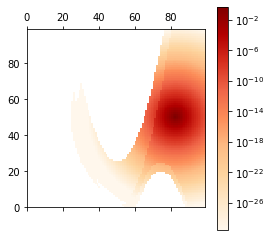

In [35]:
# list(class_flow_pos.keys())
plt.matshow(temp1, cmap=plt.get_cmap("OrRd"), norm=mpl.colors.LogNorm())
plt.xlim(0, 99)
plt.ylim(0, 99)
plt.colorbar()

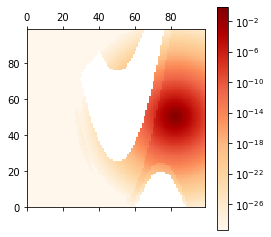

In [36]:
# list(class_flow_pos.keys())
plt.matshow(temp2, cmap=plt.get_cmap("OrRd"), norm=mpl.colors.LogNorm())
plt.xlim(0, 99)
plt.ylim(0, 99)
plt.colorbar()

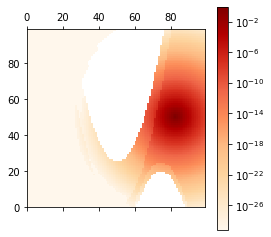

In [37]:
# list(class_flow_pos.keys())
plt.matshow(temp3, cmap=plt.get_cmap("OrRd"), norm=mpl.colors.LogNorm())
plt.xlim(0, 99)
plt.ylim(0, 99)
plt.colorbar()

(0.0, 99.0)

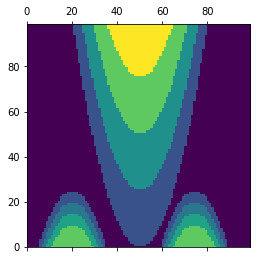

In [21]:
plt.matshow(velocity_matrix)
plt.xlim(0, 99)
plt.ylim(0, 99)

(0.0, 99.0)

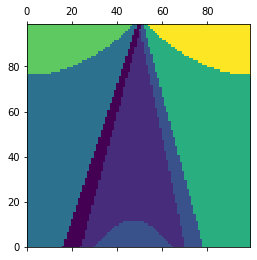

In [22]:
plt.matshow(direction_matrix)
plt.xlim(0, 99)
plt.ylim(0, 99)

In [23]:
# figure out concentration distribution